In [1]:
import math
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt

In [2]:
bounds = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]
x_opt = [0.31624357647283069, 0.316243577414338339, 0.316243578012345927, 0.316243575664017895, 0.316243578205526066,
         0.31624357738855069, 0.316243575472949512, 0.316243577164883938, 0.316243578155920302, 0.316243576147374916]
y_opt = -1.00050010001000


def G03(X):
    n = 10
    x_mul = 1
    x_2_sum = 0.0
    for i in range(n):
        x_mul *= X[i]
        x_2_sum += X[i] * X[i]
    y = -((math.sqrt(n)) ** n) * x_mul
    h1 = x_2_sum - 1 - 0.0001

    return y, h1

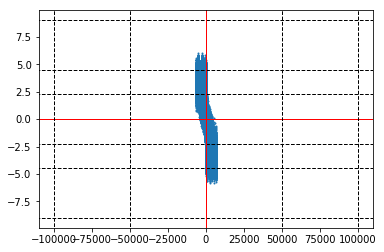

In [3]:
pN = 5000
dim = 10
keth = 0.5
eta = 0.5
X = np.zeros((pN, dim))
fmax = 100000
vmax = 8.9999
for i in range(pN):
    for j in range(dim):
        X[i][j] = bounds[j][0]+(bounds[j][1]-bounds[j][0])*np.random.random()

fs = []    
Vs = []
for i in range(pN):
    for j in range(i+1,pN):

        deltaf = G03(X[i])[0] - G03(X[j])[0]
        delraV = np.sum(G03(X[i])[1:2])-np.sum(G03(X[j])[1:2])
        fs.append(deltaf)
        Vs.append(delraV)

plt.scatter(fs,Vs,s=1)
plt.axhline(y=vmax, xmin=-fmax, xmax=fmax, color = "black", ls="--", lw="1")
plt.axhline(y=-vmax, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=0, xmin=-fmax, xmax=fmax, color = "red", ls="-", lw="1")

plt.axvline(x=fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=0, ymin=-vmax, ymax=vmax, color = "red",ls="-", lw="1")

plt.show()